In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'image_dataset/train',  # change this path according to your directory
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)

Found 11204 images belonging to 10 classes.


In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    'image_dataset/test',   # change this path according to your directory
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)

Found 3210 images belonging to 10 classes.


In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

val_generator = val_datagen.flow_from_directory(
    'image_dataset/val',    # change this path according to your directory
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'sparse'
)

Found 1597 images belonging to 10 classes.


In [16]:
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)

Class Names: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [17]:
len(class_names)

10

In [23]:
for image_batch, label_batch in train_generator:
    print(image_batch[0].shape)
    print(label_batch)
    break

(256, 256, 3)
[5. 0. 2. 9. 4. 7. 7. 6. 5. 2. 4. 4. 1. 7. 2. 1. 9. 0. 5. 7. 9. 6. 5. 6.
 5. 7. 2. 7. 1. 9. 7. 5.]


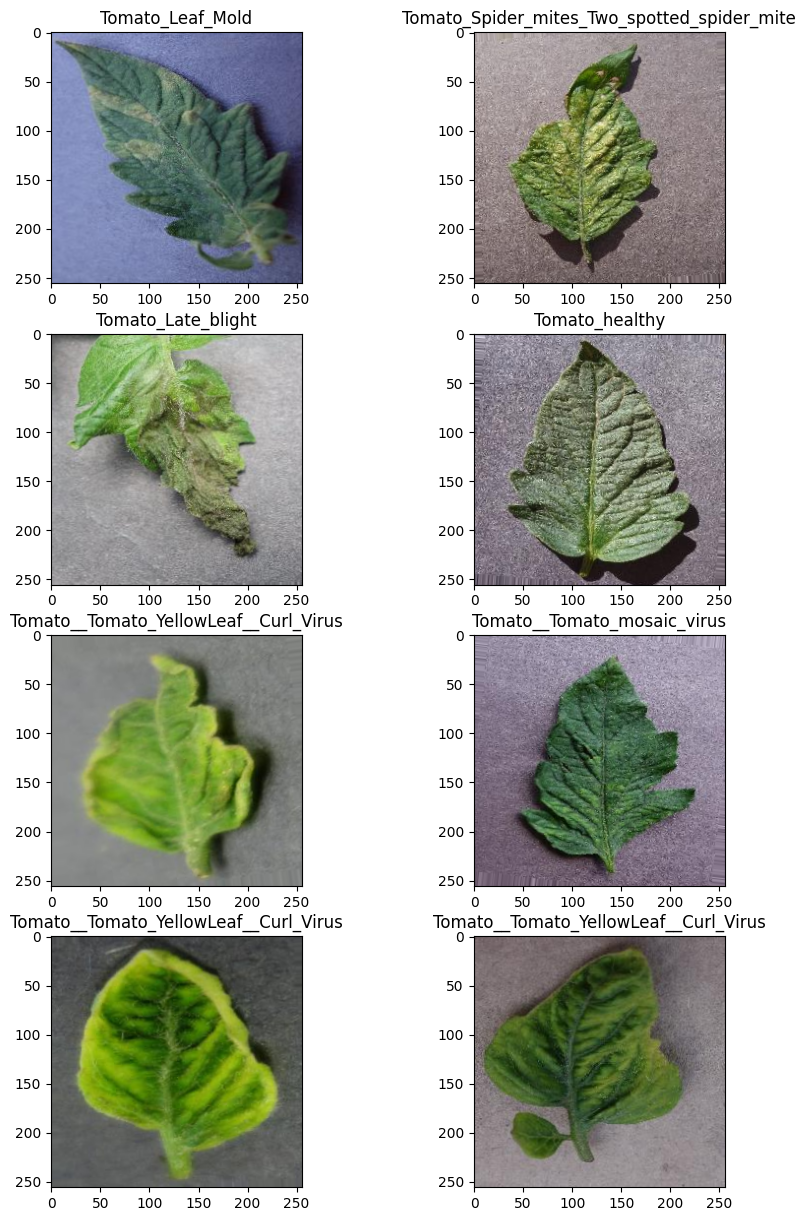

In [30]:
plt.figure(figsize=(10, 15))
for image_batch, label_batch in train_generator:
    for i in range(8):
        ax = plt.subplot(4, 2, i+1)
        plt.imshow(image_batch[i])
        label = int(label_batch[i])
        plt.title(class_names[label])

    break

In [34]:
CHANNELS = 3
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 10

In [37]:
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)       0

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']   
)

In [44]:
print(train_generator.samples)

11204


In [45]:
11204/32

350.125

In [48]:
val_generator.samples

1597

In [49]:
1597/32

49.90625

In [52]:
history = model.fit(
    train_generator,
    steps_per_epoch = 350,
    batch_size = BATCH_SIZE,
    validation_data = val_generator,
    validation_steps = 49,
    verbose=1,
    epochs=20
)

Epoch 1/20
350/350 [==============================] - 463s 1s/step - loss: 1.5614 - accuracy: 0.4536 - val_loss: 1.0650 - val_accuracy: 0.6250
Epoch 2/20
350/350 [==============================] - 266s 759ms/step - loss: 0.8567 - accuracy: 0.7025 - val_loss: 0.5488 - val_accuracy: 0.8029
Epoch 3/20
350/350 [==============================] - 262s 750ms/step - loss: 0.5914 - accuracy: 0.7943 - val_loss: 0.4627 - val_accuracy: 0.8348
Epoch 4/20
350/350 [==============================] - 268s 765ms/step - loss: 0.4499 - accuracy: 0.8443 - val_loss: 0.3917 - val_accuracy: 0.8705
Epoch 5/20
350/350 [==============================] - 251s 715ms/step - loss: 0.3858 - accuracy: 0.8674 - val_loss: 0.3504 - val_accuracy: 0.8833
Epoch 6/20
350/350 [==============================] - 245s 700ms/step - loss: 0.3169 - accuracy: 0.8919 - val_loss: 0.2445 - val_accuracy: 0.9120
Epoch 7/20
350/350 [==============================] - 154s 438ms/step - loss: 0.2810 - accuracy: 0.9031 - val_loss: 0.2485 - va

In [53]:
scores = model.evaluate(test_generator)
scores

101/101 [==============================] - 54s 535ms/step - loss: 0.1666 - accuracy: 0.9421


[0.1665855199098587, 0.9420560598373413]

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

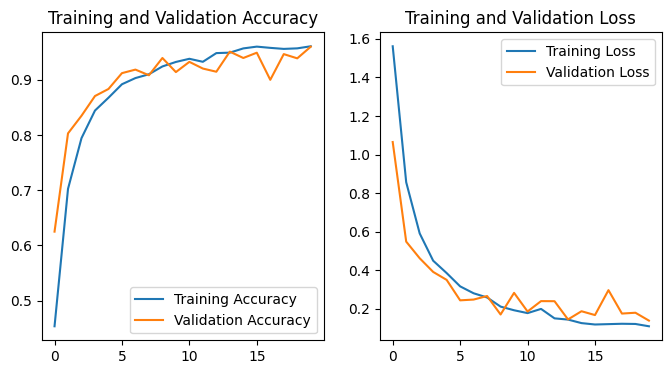

In [55]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First image to predict
Actual Label:  Tomato_Septoria_leaf_spot
1/1 [==============================] - 0s 40ms/step
Predicted Label:  Tomato_Septoria_leaf_spot


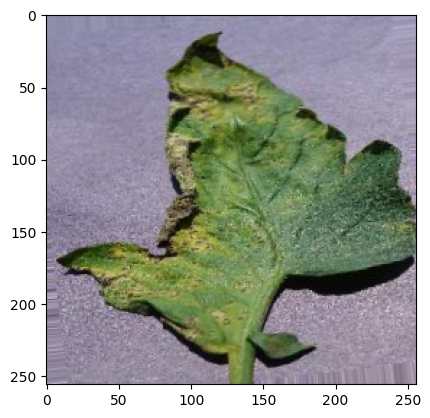

In [60]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label: ", class_names[first_label])

    batch_predictions = model.predict(image_batch)
    print("Predicted Label: ", class_names[np.argmax(batch_predictions[0])])

    break

In [61]:
tf.__version__

'2.10.1'

In [62]:
model.save('tomatoes.h5')

The approach is same to build other models, so just we will be using the dataset for which ever crop-disease we have to train our model